In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import scipy
from numpy.fft import fft, ifft, ifftshift, fftshift

Text(0.5, 1.0, 'Convergence of X(t) towards its longa-run value')

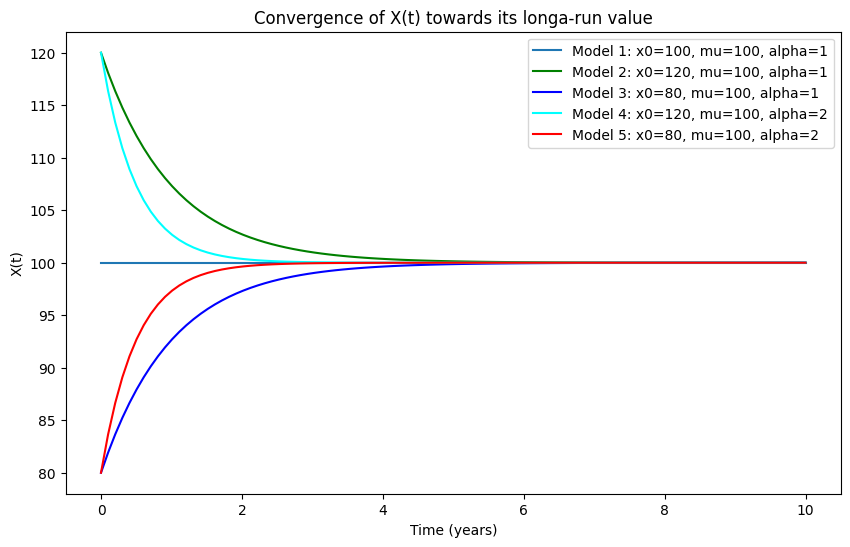

In [3]:
expiry = 10
timestep = np.linspace(0, expiry, 100)
mu = 100
alpha = 1
sol = lambda x0, alpha, timestep: mu + (x0 - mu) * np.exp(-alpha * timestep)

# Plot solutions
h = plt.figure(figsize=(10, 6))
plt.plot(timestep, sol(100, alpha, timestep), label='Model 1: x0=100, mu=100, alpha=1')
plt.plot(timestep, sol(120, alpha, timestep), 'g', label='Model 2: x0=120, mu=100, alpha=1')
plt.plot(timestep, sol(80, alpha, timestep), 'b', label='Model 3: x0=80, mu=100, alpha=1')
plt.plot(timestep, sol(120, 2 * alpha, timestep), 'cyan', label='Model 4: x0=120, mu=100, alpha=2')
plt.plot(timestep, sol(80, 2 * alpha, timestep), 'red', label='Model 5: x0=80, mu=100, alpha=2')
plt.xlabel('Time (years)')
plt.ylabel('X(t)')
plt.legend()
plt.title('Convergence of X(t) towards its longa-run value')
# plt.savefig('LecBMFigMeanReversion.png')

In [79]:
# Used in the Vasicek model for short interest rates
npaths = 20000  # number of paths
T = 1  # time horizon
nsteps = 200  # number of time steps
dt = T / nsteps  # time step
t = np.linspace(0, T, nsteps)  # observation times
alpha = 4
mu = 0.07
sigma = 0.07
X0 = 0.00  # initial value

# Allocate and initialize all paths
# X = np.column_stack([X0 * np.ones(npaths), np.zeros((nsteps, npaths))])
X = np.zeros((nsteps, npaths))
X[0,:] = X0

N = np.random.randn(nsteps, npaths)
# Compute the standard deviation for a time step
sdev = sigma * np.sqrt((1 - np.exp(-2 * alpha * dt)) / (2 * alpha))

# Compute and accumulate the increments
for i in range(nsteps-1):
    X[i + 1, :] = mu + (X[i, :] - mu) * np.exp(-alpha * dt) + sdev * N[i, :]

# 1. Euler-Maruyama Method
for i in range(nsteps-1):
    X[i+1,:] = X[i, :] + alpha * (mu - X[i, :]) * dt + sigma * np.sqrt(dt) * N[i, :]

# 2. Euler-Maruyama Method with analytical moments
# for i in range(nsteps):
#     E_X = X[:, i] * np.exp(-alpha * dt) + mu * (1 - np.exp(-alpha * dt))
#     Var_X = (sigma**2 / (2 * alpha)) * (1 - np.exp(-2 * alpha * dt))
#     X[:, i+1] = E_X + np.sqrt(Var_X) * N[:, i]

Text(0.5, 1.0, 'Ornstein-Uhlenbeck process $dX = \\alpha(\\mu-X)dt + \\sigma dW$')

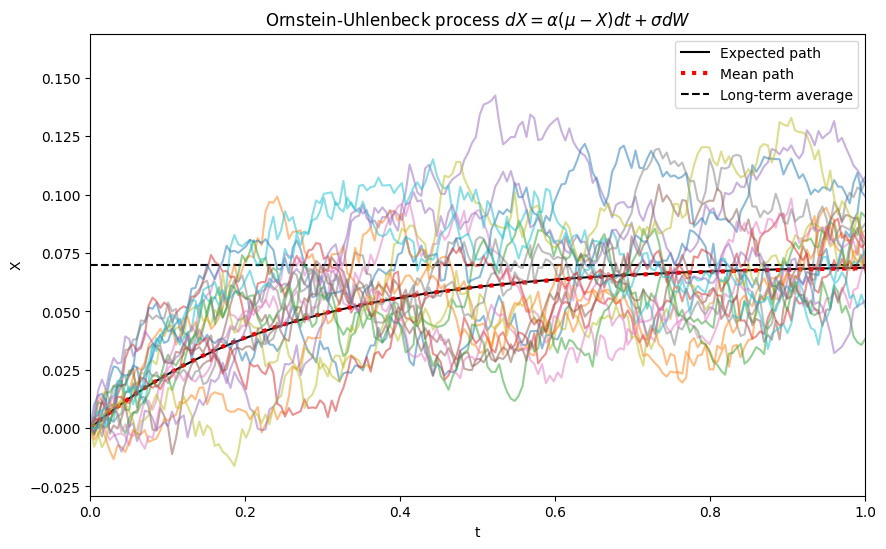

In [80]:
# Expected, mean, and sample paths, long-term average
plt.figure(figsize=(10, 6))
# EX = mu + (X0 - mu) * np.exp(-alpha * t) # Euler Maryama approx - X(t+1) minus X(t)
EX = X0*np.exp(-alpha*t) + mu*(1-np.exp(-alpha*t)) # SDE solution 
plt.plot(t, EX, 'k', label='Expected path')
plt.plot(t, np.mean(X, axis=1), 'r:', label='Mean path', lw=3)
plt.plot(t, mu * np.ones_like(t), 'k--', label='Long-term average')
plt.plot(t, X[:, ::1000], alpha=0.5)
plt.legend()
plt.xlabel('t')
plt.ylabel('X')
sdevinfty = sigma / np.sqrt(2 * alpha)
plt.ylim([mu - 4 * sdevinfty, mu + 4 * sdevinfty])
plt.xlim([0,T])
plt.title('Ornstein-Uhlenbeck process $dX = \\alpha(\\mu-X)dt + \\sigma dW$')

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_87038/1693307685.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(t, sigma**2 * t, 'g', label='$\sigma^2t$')
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_87038/1693307685.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(t, sigma**2 / (2 * alpha) * np.ones_like(t), 'b', label='$\sigma^2/(2\\alpha)$')


Text(0.5, 1.0, 'Ornstein-Uhlenbeck process: Variance')

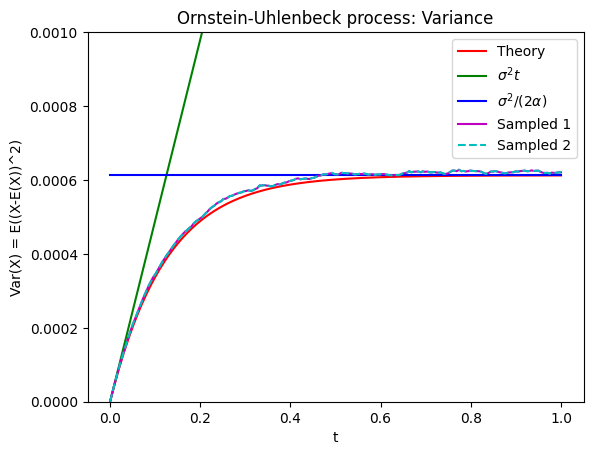

In [46]:
# Variance = mean square deviation
plt.figure()
plt.plot(t, sigma**2 / (2 * alpha) * (1 - np.exp(-2 * alpha * t)), 'r', label='Theory')
plt.plot(t, sigma**2 * t, 'g', label='$\sigma^2t$')
plt.plot(t, sigma**2 / (2 * alpha) * np.ones_like(t), 'b', label='$\sigma^2/(2\\alpha)$')
plt.plot(t, np.var(X, axis=1), 'm', label='Sampled 1')
plt.plot(t, np.mean((X - EX[:, np.newaxis])**2, axis=1), 'c--', label='Sampled 2')
plt.legend(loc='upper right')
plt.xlabel('t')
plt.ylabel('Var(X) = E((X-E(X))^2)')
plt.ylim([0, 0.001])
plt.title('Ornstein-Uhlenbeck process: Variance')

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_87038/1843036321.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(t, sigma * np.sqrt(2 * t / np.pi), 'g', label='$\sigma(2t/\pi)^{1/2}$')
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_87038/1843036321.py:9: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('E(|X-E(X)|) = $(2Var(X)/\pi)^{1/2}$')


Text(0.5, 1.0, 'Ornstein-Uhlenbeck process: Mean Absolute Deviation')

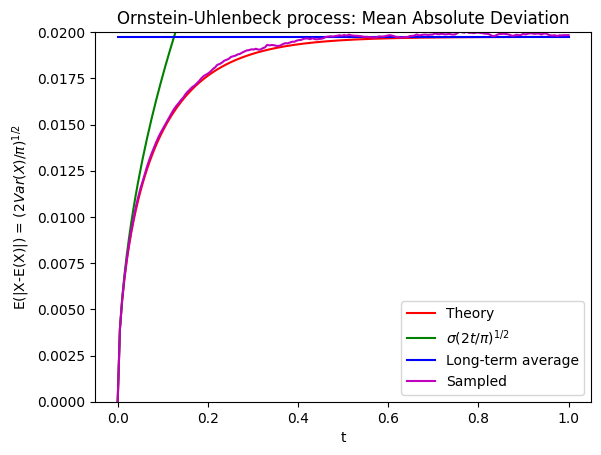

In [47]:
# Mean absolute deviation
plt.figure()
plt.plot(t, sigma * np.sqrt((1 - np.exp(-2 * alpha * t)) / (np.pi * alpha)), 'r', label='Theory')
plt.plot(t, sigma * np.sqrt(2 * t / np.pi), 'g', label='$\sigma(2t/\pi)^{1/2}$')
plt.plot(t, sigma / np.sqrt(np.pi * alpha) * np.ones_like(t), 'b', label='Long-term average')
plt.plot(t, np.mean(np.abs(X - EX[:, np.newaxis]), axis=1), 'm', label='Sampled')
plt.legend(loc='lower right')
plt.xlabel('t')
plt.ylabel('E(|X-E(X)|) = $(2Var(X)/\pi)^{1/2}$')
plt.ylim([0, 0.02])
plt.title('Ornstein-Uhlenbeck process: Mean Absolute Deviation')

Text(0.5, 1.0, 'Ornstein-Uhlenbeck process: PDF at different times')

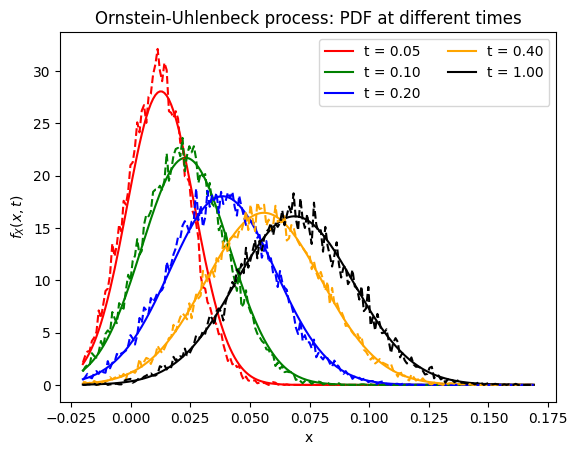

In [41]:
# Probability density function at different times
x = np.linspace(-0.02, mu + 4 * sdevinfty, 200)
t2 = np.array([0.05, 0.1, 0.2, 0.4, 1.0])

# Euler Maruyama
# fixed time step you get a better result - could see how difference between actual and euler change with changes in dt
EX2 = mu + (X0 - mu) * np.exp(-alpha * t2)
sdev2 = sigma * np.sqrt((1 - np.exp(-2 * alpha * t2)) / (2 * alpha))

# Initialise arrays for analytical and sampled PDFs
fa = np.zeros((len(x), len(t2)))  # analytical
fs = np.zeros((len(x), len(t2)))  # sampled

# Compute PDFs
for i, t in enumerate(t2):
    fa[:, i] = norm.pdf(x, EX2[i], sdev2[i])
    bincounts, _ = np.histogram(X[int(t * nsteps-1), :], bins=x, density=True)
    fs[:-1, i] = bincounts

plt.figure()
plt.gca().set_prop_cycle(color=['red', 'green', 'blue', 'orange', 'black'])
plt.plot(x, fa, label = 'Analytical')
plt.plot(x, fs, linestyle='--', label = 'Sampled')
plt.legend(['t = 0.05', 't = 0.10', 't = 0.20', 't = 0.40', 't = 1.00'] , ncol=2, loc=0)
plt.xlabel('x')
plt.ylabel('$f_X(x,t)$')
plt.title('Ornstein-Uhlenbeck process: PDF at different times')

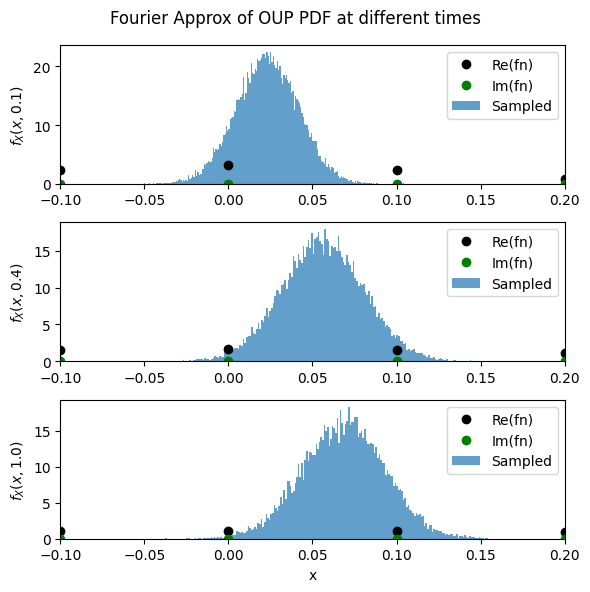

In [81]:
# -- OU MONTE CARLO SECTION -----
t = np.linspace(0, T, nsteps + 1)
theta = 0.2
kappa = 0.3
sigma = 0.4
x0 = 0  # Initial value

N = 512
dx = 0.1
upperx = N * dx
x = dx * np.arange(-N/2, N/2)
dxi = 2 * np.pi / (N * dx)
xi = dxi * np.arange(-N/2, N/2)

def Fa(t):
    a = kappa * theta - kappa  # given relationship
    phi = np.exp(1j * x0 * xi * np.exp(a * t) - (sigma**2 * (np.exp(2 * a * t) - 1) * xi**2) / (4 * a))
    return phi

fig, ax = plt.subplots(3,1, figsize=(6,6))
for i,time in enumerate([20, 80, -1]):

    # Pulsation space: xi
    char_func = Fa(t[time])
    f_X = fftshift(fft(ifftshift(char_func))) / upperx

    ax[i].hist(X[time, :],density=True,bins=nsteps, alpha=0.7)
    ax[i].plot(x,np.real(f_X), 'ko', linewidth=2)
    ax[i].plot(x,np.imag(f_X), 'go')
    
    ax[i].set_ylabel(f'$f_X(x, {t[time]:.1f})$')
    ax[i].set_xlim(-0.1,0.2)
    ax[i].legend(['Re(fn)', 'Im(fn)','Sampled'])

plt.suptitle('Fourier Approx of OUP PDF at different times')
plt.xlabel('x')
plt.tight_layout()

Text(0.5, 1.0, 'Ornstein-Uhlenbeck process: autocovariance')

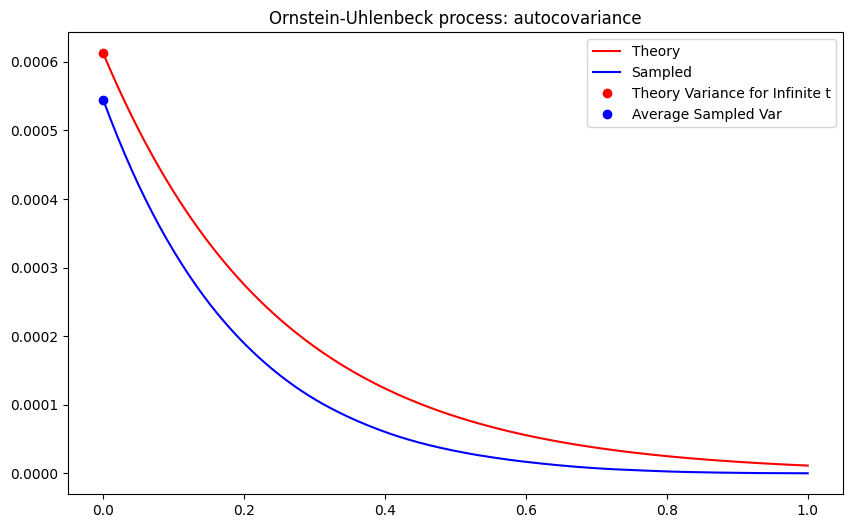

In [64]:
from scipy.signal import correlate
# Initialize the autocovariance array
C = np.zeros((npaths, 2 * nsteps-1))
# Calculate the autocovariance for each path
for i in range(npaths):
    deviation = X[:, i] - EX
    # Compute autocorrelation and normalize by the number of steps
    C[i, :] = correlate(deviation, deviation, mode='full') / nsteps
# Average over all paths
C = np.mean(C, axis=0)


plt.figure(figsize=(10, 6))
t = np.linspace(0, T, nsteps)
# Plot theoretical autocovariance - sigma^2 / (2 * alpha) * exp(-alpha * t)
plt.plot(t, sigma**2 / (2 * alpha) * np.exp(-alpha * t), 'r', label='Theory')

# Plot sampled autocovariance - plot second half since it's symmetric and the first half corresponds to negative lags
plt.plot(t, C[-nsteps:], 'b', label='Sampled')

plt.plot(0, sigma**2 / (2 * alpha), 'ro', label ='Theory Variance for Infinite t')  # Var for infinite t (sigma^2 / (2 * alpha))
plt.plot(0, np.mean(np.var(X, axis=1, ddof=0)), 'bo', label='Average Sampled Var', linewidth=1.5) # average sampled variance
plt.legend(loc=0)
plt.title('Ornstein-Uhlenbeck process: autocovariance')

Text(0.5, 1.0, 'Ornstein-Uhlenbeck process: autocorrelation')

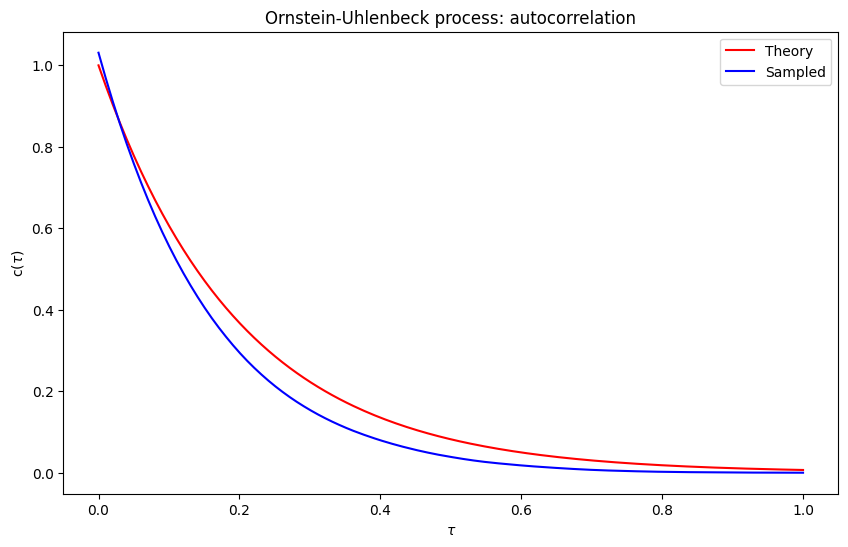

In [11]:
## Autocorrelation

# The autocorrelation is the Covariance/Variance. However, since our OUP is
# only quasi-stationary (i.e. it is only stationary in the limit t -> inf)
# we will compute the autocorrelation as we have done above, in the limit
# as t -> inf

# It can be shown that in the limit, the autocorrelation becomes
# Corr(t,s) = exp(-1*alpha*tau)     with t < s

# Theoretical autocorrelation
CORRX = np.exp(-alpha * t)

# Begin plotting
plt.figure(figsize=(10, 6))

# Plot theoretical autocorrelation as a red line
plt.plot(t, CORRX, 'r', label='Theory')

# Plot sampled autocorrelation
# The sampled autocorrelation is computed as the autocovariance divided by the variance at time 0 (C[nsteps+1])
# Here, we use the second half of C (corresponding to non-negative lags)
plt.plot(t, (C[-nsteps:] / C[nsteps]), 'b', label='Sampled')

# Add labels, legend, and title
plt.xlabel(r'$\tau$')
plt.ylabel(r'c($\tau$)')
plt.legend()
plt.title('Ornstein-Uhlenbeck process: autocorrelation')